In [1]:
import pandas as pd

In [2]:
#read seattle incidents
url="https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/seattle_incidents_summer_2014.csv"
df_seattle=pd.read_csv(url, low_memory=False)

In [3]:
#read san francisco incidents
url="https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv"
df_san_francisco=pd.read_csv(url, low_memory=False)

In [4]:
from datetime import datetime

In [5]:
#some transformations to the column "Time" in the data of San Francisco

df_san_francisco['Time_timestamp'] = pd.to_datetime(df_san_francisco['Time'])
df_san_francisco['Time_timestamp'] = df_san_francisco['Time_timestamp'].dt.floor('h')
df_san_francisco['time_hour_truncate']= df_san_francisco['Time_timestamp'] .dt.hour

In [6]:
#some transformations to the column "Time" in the data of Seattle

df_seattle['Time_timestamp'] = pd.to_datetime(df_seattle['Date Reported'])
df_seattle['Time_timestamp'] = df_seattle['Time_timestamp'].dt.floor('h')
df_seattle['time_hour_truncate']= df_seattle['Time_timestamp'] .dt.hour

In [7]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'San Francisco incidents - Hours of the day')

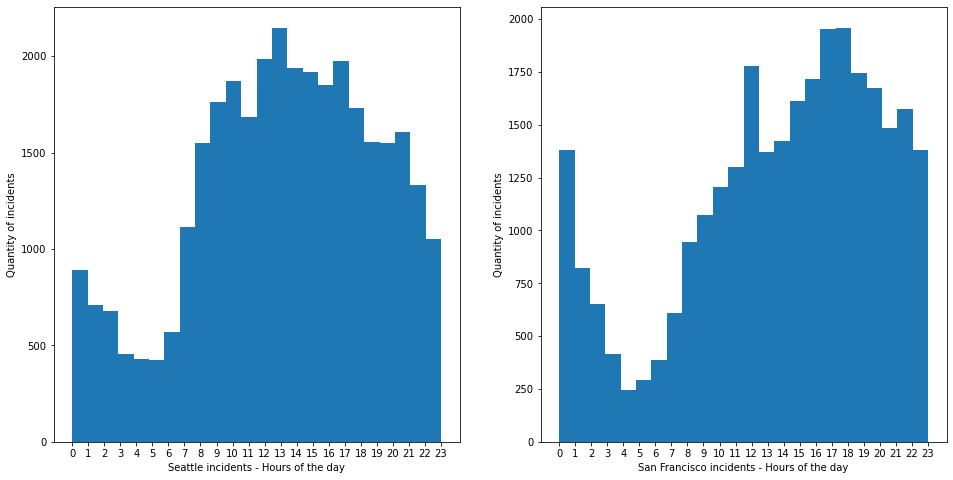

In [16]:
#putting side by side the histograms of incidents per hour for both cities

x_ticks = [i for i in range(0,24)]
plt.figure(figsize = [16, 8]) 
plt.xticks(x_ticks)

plt.subplot(1, 2, 1) 
plt.hist(data = df_seattle, x = 'time_hour_truncate', bins = 24)
plt.xticks(x_ticks)
plt.ylabel('Quantity of incidents')
plt.xlabel('Seattle incidents - Hours of the day')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.hist(data = df_san_francisco, x = 'time_hour_truncate', bins = 24)
plt.xticks(x_ticks)
plt.ylabel('Quantity of incidents')
plt.xlabel('San Francisco incidents - Hours of the day')

Analyzing the two histograms, we can see that there are a concentration of incidents from early morning until late afternoon.
Furthermore, the lowest number of incidents occurs around 4:00 am and 5:00 am in both cities. However, the peak of incidents varies between them. In Seattle, peak incidents occur at 13 (1 pm), while in San Francisco it occurs at 18 and 19 (6 pm and 7 pm)

Next we will analyze the incidents that occur in the evening, by the "category" of the incidents. In this case, evening will be considered all the incidents that occur after 5pm until 11:59 pm.

In [17]:
#create an auxiliar dataframe only with the data of San Francisco that occur in the evening
df_san_francisco_evening = df_san_francisco.loc[df_san_francisco['time_hour_truncate']>17]

#create an auxiliar dataframe only with the data of Seattle that occur in the evening
df_seattle_evening = df_seattle.loc[df_seattle['time_hour_truncate']>17]

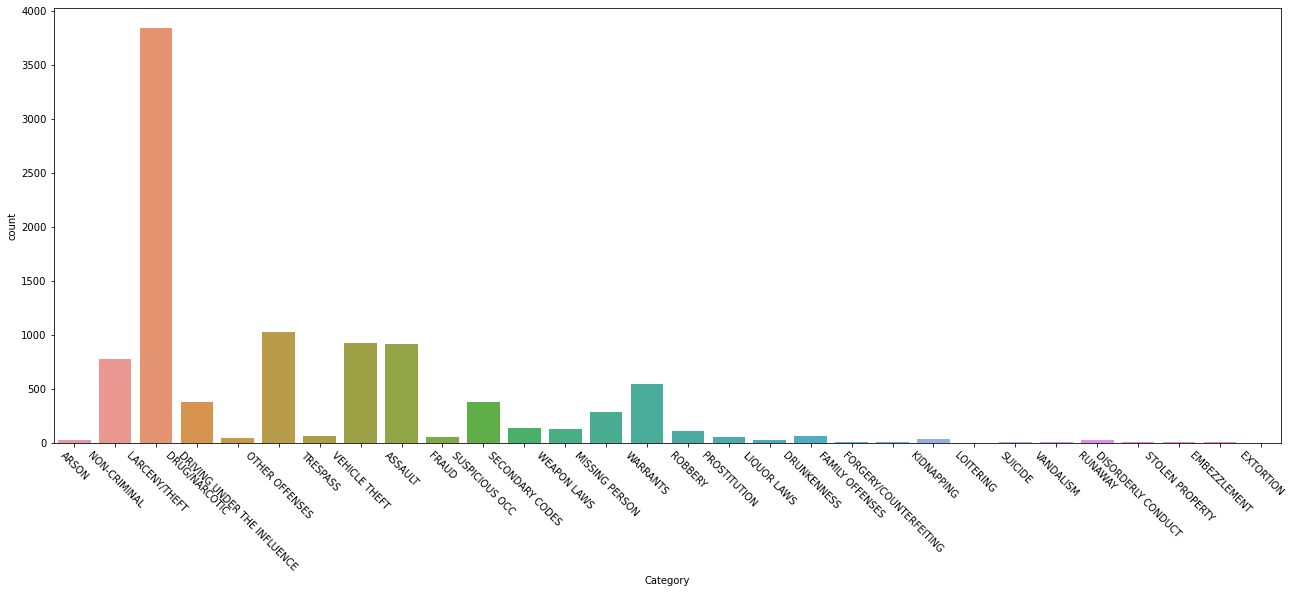

In [28]:
import seaborn as sns
#create a bar chart for the evening data of San Francisco, in relation of the type of the incident ("Category")
plt.figure(figsize = [22, 8])
ax = sns.countplot(x ='Category', data = df_san_francisco_evening)

ax.set_xticklabels(list(df_san_francisco_evening['Category'].unique()), rotation=-45)
plt.show()

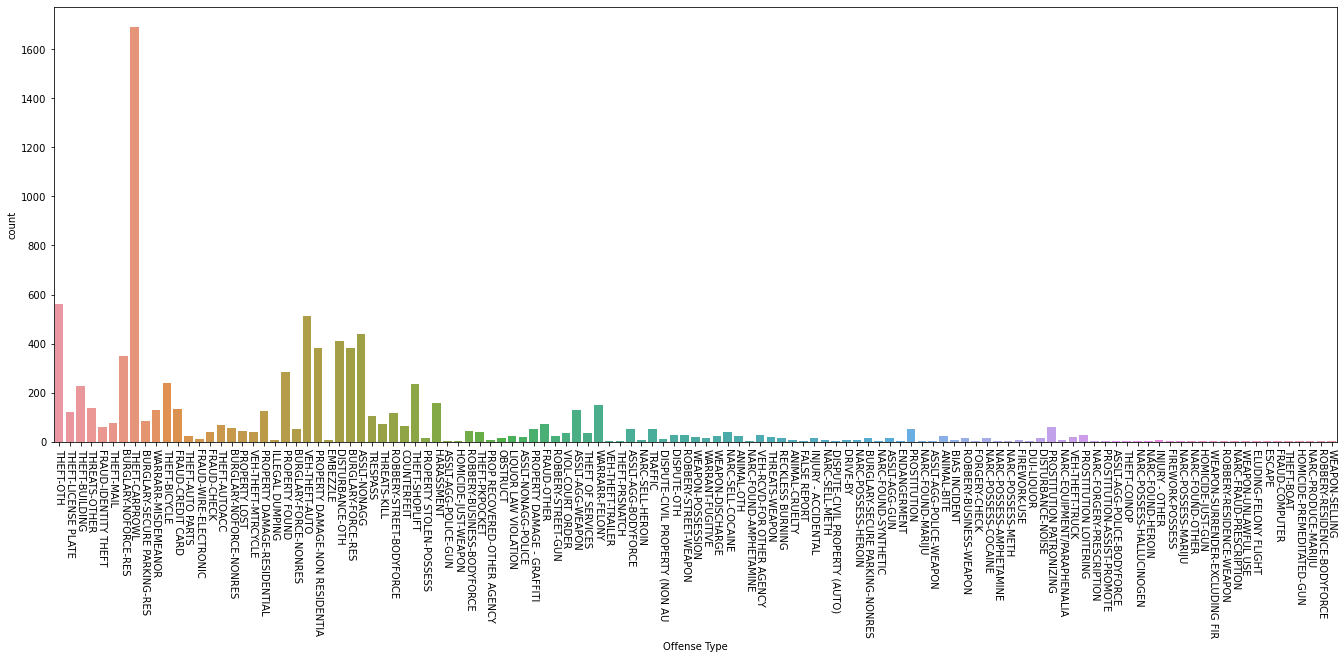

In [27]:
#create a bar chart for the evening data of Seattle, in relation of the type of the incident ("Category")
plt.figure(figsize = [23, 8])
ax_2 = sns.countplot(x ='Offense Type', data = df_seattle_evening)

ax_2.set_xticklabels(list(df_seattle_evening['Offense Type'].unique()), rotation=-90)
plt.show()

Analyzing the two histograms for the type of incidents, firstly we can see that for Seattle we have more types of incidents than San Francisco. However, in both cases, the type like "THEFT" is where there are greater concentration.